# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [4]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [5]:
powers_df.shape

(667, 168)

In [6]:
heroes_df.shape

(734, 11)

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [7]:
heroes_df.drop(['Unnamed: 0'], axis=1, inplace=True)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [8]:
type(heroes_df['Skin color'][0])

str

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
for i in heroes_df:
    heroes_df[i].values_counts()


AttributeError: 'Series' object has no attribute 'values_counts'

In [11]:
heroes_df['Height'].sort_values()

647    -99.0
675    -99.0
151    -99.0
384    -99.0
153    -99.0
671    -99.0
492    -99.0
605    -99.0
383    -99.0
158    -99.0
159    -99.0
160    -99.0
382    -99.0
381    -99.0
163    -99.0
380    -99.0
582    -99.0
167    -99.0
376    -99.0
169    -99.0
374    -99.0
584    -99.0
550    -99.0
541    -99.0
469    -99.0
488    -99.0
493    -99.0
177    -99.0
677    -99.0
146    -99.0
       ...  
527    213.0
667    218.0
709    218.0
119    218.0
692    226.0
179    226.0
184    226.0
691    229.0
33     229.0
413    229.0
388    234.0
17     244.0
386    244.0
331    244.0
229    244.0
19     257.0
321    259.0
203    267.0
576    279.0
611    279.0
373    287.0
557    297.0
730    304.8
504    305.0
575    305.0
463    366.0
718    366.0
302    701.0
272    876.0
255    975.0
Name: Height, Length: 734, dtype: float64

In [12]:
heroes_df.sort_values(by=['Height'])

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
647,Swamp Thing,Male,red,God / Eternal,No Hair,-99.0,DC Comics,green,bad,-99.0
675,Tracy Strauss,Female,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
151,Captain Cold,Male,brown,Human,Brown,-99.0,DC Comics,-,neutral,-99.0
384,Kid Flash,Male,green,Human,Red,-99.0,DC Comics,-,good,-99.0
153,Captain Hindsight,Male,-,Human,Black,-99.0,South Park,-,good,-99.0
671,Titan,Male,-,-,-,-99.0,HarperCollins,-,good,-99.0
492,Niki Sanders,Female,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
605,Siren II,Female,black,-,-,-99.0,DC Comics,-,bad,-99.0
383,Kick-Ass,Male,blue,Human,Blond,-99.0,Icon Comics,-,good,-99.0
158,Captain Midnight,Male,-,Human,-,-99.0,Dark Horse Comics,-,good,-99.0


In [13]:
heroes_df.shape

(734, 10)

In [14]:
heroes_df[heroes_df.Height == -99].shape

(217, 10)

In [15]:
import numpy as np
np.mean([1,2,np.nan])

nan

In [16]:
heroes_df.replace(for x in heroes_df if typeheroes_df[x])

SyntaxError: invalid syntax (<ipython-input-16-da8724010b32>, line 1)

In [17]:
heroes_df.apply(lambda x: x ('-99.0', None))

TypeError: ("'Series' object is not callable", 'occurred at index name')

In [18]:
np.mean(heroes_df.Height[heroes_df.Height != -99])

186.72630560928434

In [19]:
np.median(heroes_df.Height[heroes_df.Height != -99])

183.0

In [20]:
type(np.nan)

float

In [21]:
heroes_df['Height'].value_counts()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
 185.0     35
 175.0     34
 168.0     29
 170.0     26
 165.0     26
 191.0     21
 193.0     21
 198.0     18
 173.0     17
 201.0     11
 196.0     11
 163.0      8
 213.0      7
 203.0      5
 211.0      5
 157.0      5
 244.0      4
 229.0      3
 155.0      3
 218.0      3
 226.0      3
 122.0      2
 206.0      2
 279.0      2
 366.0      2
 137.0      2
 30.5       2
 305.0      2
 61.0       1
 975.0      1
 142.0      1
 287.0      1
 267.0      1
 304.8      1
 701.0      1
 876.0      1
 259.0      1
 15.2       1
 297.0      1
 257.0      1
 62.5       1
 66.0       1
 160.0      1
 140.0      1
 234.0      1
 71.0       1
 79.0       1
 108.0      1
 64.0       1
Name: Height, dtype: int64

In [22]:
powers_df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [23]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [24]:
heroes_df = heroes_df.applymap(lambda x: None if x == -99.0 else x)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,Adam Monroe,Male,blue,-,Blond,NaN,NBC - Heroes,-,good,NaN
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [25]:
heroes_df = heroes_df.applymap(lambda x: None if x == '-' else x)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,None,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,None,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,None,bad,NaN
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,None,bad,122.0
6,Adam Monroe,Male,blue,None,Blond,NaN,NBC - Heroes,None,good,NaN
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,None,good,88.0
8,Agent 13,Female,blue,None,Blond,173.0,Marvel Comics,None,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,None,good,81.0


In [26]:
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,None,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,None,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,None,bad,NaN
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,None,bad,122.0
6,Adam Monroe,Male,blue,None,Blond,NaN,NBC - Heroes,None,good,NaN
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,None,good,88.0
8,Agent 13,Female,blue,None,Blond,173.0,Marvel Comics,None,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,None,good,81.0


In [27]:
powers_df

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [28]:
heroes_df.set_index('name')
powers_df.set_index('hero_names')
outer_join = heroes_df.join(powers_df, how='outer')
outer_join

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,None,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,None,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,None,bad,NaN,...,False,False,False,False,False,False,False,False,False,False
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,None,bad,122.0,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,None,Blond,NaN,NBC - Heroes,None,good,NaN,...,False,False,False,False,False,False,False,False,False,False
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,None,good,88.0,...,False,False,False,False,False,False,False,False,False,False
8,Agent 13,Female,blue,None,Blond,173.0,Marvel Comics,None,good,61.0,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,None,good,81.0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
outer_join.shape 

(734, 178)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

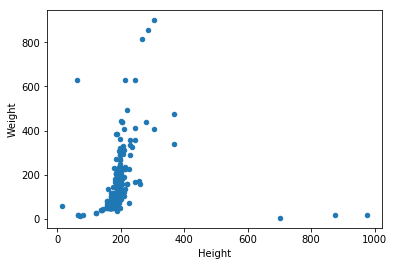

In [30]:
outer_join.plot.scatter(x='Height' , y = 'Weight')

In [31]:
male_heroes_df.plot.scatter(x='Height', y='Weight')
female_heroes_df.plot.scatter(x='Height', y='Weight')

NameError: name 'male_heroes_df' is not defined

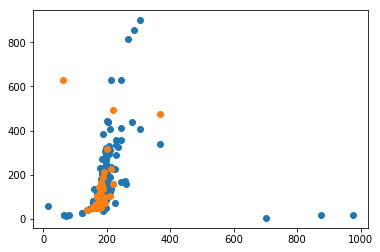

In [9]:
for i in ['Male','Female']:
    d = heroes_df[heroes_df.Gender ==i]
    plt.scatter(d['Height'], d['Weight'])

In [10]:
outer_join.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,174.684028,78.838028
Male,191.974860,125.572271


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [18]:
ind_drop_f = heroes_df[heroes_df['Gender'].apply(lambda x: x =='Male')].index
new_df_f= heroes_df.drop(ind_drop_f)
new_df_f

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
8,Agent 13,Female,blue,None,Blond,173.0,Marvel Comics,None,good,61.0
24,Angel Dust,Female,yellow,Mutant,Black,165.0,Marvel Comics,None,good,57.0
25,Angel Salvadore,Female,brown,None,Black,163.0,Marvel Comics,None,good,54.0
26,Angela,Female,None,None,None,NaN,Image Comics,None,bad,NaN
38,Arachne,Female,blue,Human,Blond,175.0,Marvel Comics,None,good,63.0
40,Arclight,Female,violet,None,Purple,173.0,Marvel Comics,None,bad,57.0
41,Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
43,Ariel,Female,purple,None,Pink,165.0,Marvel Comics,None,good,59.0
44,Armor,Female,black,None,Black,163.0,Marvel Comics,None,good,50.0
51,Atom Girl,Female,black,None,Black,168.0,DC Comics,None,good,54.0


In [10]:
male_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Male']
female_heroes_df = heroes_df.loc[heroes_df['Gender'] == 'Female']
male_heroes = male_heroes_df.dropna()
female_heroes = female_heroes_df.dropna()

def show_distplot(dataframe, gender, column_name):
    return sns.distplot(dataframe[column_name])


/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


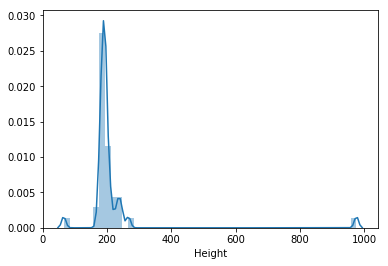

In [11]:
# Male Height
# print(min(list(male_heroes_df['Height'])))
# max(list(male_heroes_df['Height']))

show_distplot(male_heroes, 'Male', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


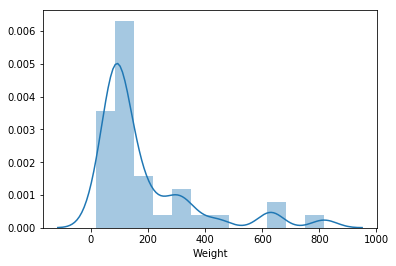

In [64]:
# Male Weight
# print(min(list(male_heroes_df['Weight'])))
# max(list(male_heroes_df['Weight']))
show_distplot(male_heroes, 'Male', 'Weight')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


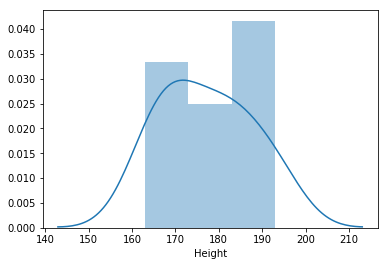

In [65]:
# Female Height
# print(min(list(female_heroes_df['Height'])))
# max(list(female_heroes_df['Height']))
show_distplot(female_heroes, 'Female', 'Height')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


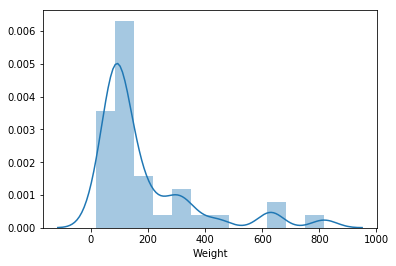

In [66]:
# Female Weight
# print(min(list(female_heroes_df['Weight'])))
# max(list(female_heroes_df['Weight']))
show_distplot(male_heroes, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [57]:
(powers_df.iloc[:,1:].sum().sort_values(ascending=False)).iloc[:5].index

Index(['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility'], dtype='object')

In [11]:
for x in powers_df:
    display(powers_df[x].value_counts())

Spider-Woman          1
Atom Girl             1
Flash II              1
Forge                 1
Goblin Queen          1
Cat                   1
Niki Sanders          1
Firebird              1
Titan                 1
Bizarro-Girl          1
Hal Jordan            1
Elektra               1
Scarecrow             1
Power Girl            1
Scorpion              1
Sobek                 1
Beast                 1
Kick-Ass              1
Mister Knife          1
Spider-Girl           1
Flash                 1
Amazo                 1
Minna Murray          1
Taskmaster            1
Scorpia               1
Scarlet Spider        1
Brundlefly            1
Vibe                  1
Allan Quatermain      1
Wonder Woman          1
                     ..
Monarch               1
Doppelganger          1
Blade                 1
Hawkeye II            1
Skaar                 1
Mister Sinister       1
Ra's Al Ghul          1
Razor-Fist II         1
Kilowog               1
Robin V               1
Drax the Destroy

False    425
True     242
Name: Agility, dtype: int64

False    489
True     178
Name: Accelerated Healing, dtype: int64

False    656
True      11
Name: Lantern Power Ring, dtype: int64

False    642
True      25
Name: Dimensional Awareness, dtype: int64

False    620
True      47
Name: Cold Resistance, dtype: int64

False    410
True     257
Name: Durability, dtype: int64

False    541
True     126
Name: Stealth, dtype: int64

False    590
True      77
Name: Energy Absorption, dtype: int64

False    455
True     212
Name: Flight, dtype: int64

False    637
True      30
Name: Danger Sense, dtype: int64

False    646
True      21
Name: Underwater breathing, dtype: int64

False    548
True     119
Name: Marksmanship, dtype: int64

False    562
True     105
Name: Weapons Master, dtype: int64

False    659
True       8
Name: Power Augmentation, dtype: int64

False    642
True      25
Name: Animal Attributes, dtype: int64

False    554
True     113
Name: Longevity, dtype: int64

False    509
True     158
Name: Intelligence, dtype: int64

True     360
False    307
Name: Super Strength, dtype: int64

False    648
True      19
Name: Cryokinesis, dtype: int64

False    575
True      92
Name: Telepathy, dtype: int64

False    659
True       8
Name: Energy Armor, dtype: int64

False    520
True     147
Name: Energy Blasts, dtype: int64

False    651
True      16
Name: Duplication, dtype: int64

False    612
True      55
Name: Size Changing, dtype: int64

False    652
True      15
Name: Density Control, dtype: int64

False    378
True     289
Name: Stamina, dtype: int64

False    663
True       4
Name: Astral Travel, dtype: int64

False    660
True       7
Name: Audio Control, dtype: int64

False    661
True       6
Name: Dexterity, dtype: int64

False    666
True       1
Name: Omnitrix, dtype: int64

False    418
True     249
Name: Super Speed, dtype: int64

False    659
True       8
Name: Possession, dtype: int64

False    627
True      40
Name: Animal Oriented Powers, dtype: int64

False    609
True      58
Name: Weapon-based Powers, dtype: int64

False    645
True      22
Name: Electrokinesis, dtype: int64

False    657
True      10
Name: Darkforce Manipulation, dtype: int64

False    660
True       7
Name: Death Touch, dtype: int64

False    595
True      72
Name: Teleportation, dtype: int64

False    578
True      89
Name: Enhanced Senses, dtype: int64

False    606
True      61
Name: Telekinesis, dtype: int64

False    625
True      42
Name: Energy Beams, dtype: int64

False    623
True      44
Name: Magic, dtype: int64

False    666
True       1
Name: Hyperkinesis, dtype: int64

False    602
True      65
Name: Jump, dtype: int64

False    663
True       4
Name: Clairvoyance, dtype: int64

False    644
True      23
Name: Dimensional Travel, dtype: int64

False    664
True       3
Name: Power Sense, dtype: int64

False    601
True      66
Name: Shapeshifting, dtype: int64

False    637
True      30
Name: Peak Human Condition, dtype: int64

False    598
True      69
Name: Immortality, dtype: int64

False    646
True      21
Name: Camouflage, dtype: int64

False    659
True       8
Name: Element Control, dtype: int64

False    636
True      31
Name: Phasing, dtype: int64

False    638
True      29
Name: Astral Projection, dtype: int64

False    666
True       1
Name: Electrical Transport, dtype: int64

False    635
True      32
Name: Fire Control, dtype: int64

False    665
True       2
Name: Projection, dtype: int64

False    663
True       4
Name: Summoning, dtype: int64

False    642
True      25
Name: Enhanced Memory, dtype: int64

False    503
True     164
Name: Reflexes, dtype: int64

False    550
True     117
Name: Invulnerability, dtype: int64

False    629
True      38
Name: Energy Constructs, dtype: int64

False    581
True      86
Name: Force Fields, dtype: int64

False    630
True      37
Name: Self-Sustenance, dtype: int64

False    666
True       1
Name: Anti-Gravity, dtype: int64

False    648
True      19
Name: Empathy, dtype: int64

False    663
True       4
Name: Power Nullifier, dtype: int64

False    660
True       7
Name: Radiation Control, dtype: int64

False    618
True      49
Name: Psionic Powers, dtype: int64

False    656
True      11
Name: Elasticity, dtype: int64

False    650
True      17
Name: Substance Secretion, dtype: int64

False    661
True       6
Name: Elemental Transmogrification, dtype: int64

False    644
True      23
Name: Technopath/Cyberpath, dtype: int64

False    664
True       3
Name: Photographic Reflexes, dtype: int64

False    664
True       3
Name: Seismic Power, dtype: int64

False    662
True       5
Name: Animation, dtype: int64

False    645
True      22
Name: Precognition, dtype: int64

False    645
True      22
Name: Mind Control, dtype: int64

False    649
True      18
Name: Fire Resistance, dtype: int64

False    655
True      12
Name: Power Absorption, dtype: int64

False    595
True      72
Name: Enhanced Hearing, dtype: int64

False    665
True       2
Name: Nova Force, dtype: int64

False    662
True       5
Name: Insanity, dtype: int64

False    644
True      23
Name: Hypnokinesis, dtype: int64

False    658
True       9
Name: Animal Control, dtype: int64

False    631
True      36
Name: Natural Armor, dtype: int64

False    647
True      20
Name: Intangibility, dtype: int64

False    642
True      25
Name: Enhanced Sight, dtype: int64

False    625
True      42
Name: Molecular Manipulation, dtype: int64

False    643
True      24
Name: Heat Generation, dtype: int64

False    662
True       5
Name: Adaptation, dtype: int64

False    657
True      10
Name: Gliding, dtype: int64

False    634
True      33
Name: Power Suit, dtype: int64

False    655
True      12
Name: Mind Blast, dtype: int64

False    658
True       9
Name: Probability Manipulation, dtype: int64

False    651
True      16
Name: Gravity Control, dtype: int64

False    639
True      28
Name: Regeneration, dtype: int64

False    652
True      15
Name: Light Control, dtype: int64

False    665
True       2
Name: Echolocation, dtype: int64

False    641
True      26
Name: Levitation, dtype: int64

False    657
True      10
Name: Toxin and Disease Control, dtype: int64

False    666
True       1
Name: Banish, dtype: int64

False    615
True      52
Name: Energy Manipulation, dtype: int64

False    624
True      43
Name: Heat Resistance, dtype: int64

False    609
True      58
Name: Natural Weapons, dtype: int64

False    634
True      33
Name: Time Travel, dtype: int64

False    635
True      32
Name: Enhanced Smell, dtype: int64

False    629
True      38
Name: Illusions, dtype: int64

False    666
True       1
Name: Thirstokinesis, dtype: int64

False    666
True       1
Name: Hair Manipulation, dtype: int64

False    665
True       2
Name: Illumination, dtype: int64

False    660
True       7
Name: Omnipotent, dtype: int64

False    660
True       7
Name: Cloaking, dtype: int64

False    666
True       1
Name: Changing Armor, dtype: int64

False    660
True       7
Name: Power Cosmic, dtype: int64

False    666
True       1
Name: Biokinesis, dtype: int64

False    654
True      13
Name: Water Control, dtype: int64

False    657
True      10
Name: Radiation Immunity, dtype: int64

False    624
True      43
Name: Vision - Telescopic, dtype: int64

False    619
True      48
Name: Toxin and Disease Resistance, dtype: int64

False    666
True       1
Name: Spatial Awareness, dtype: int64

False    660
True       7
Name: Energy Resistance, dtype: int64

False    634
True      33
Name: Telepathy Resistance, dtype: int64

False    665
True       2
Name: Molecular Combustion, dtype: int64

False    646
True      21
Name: Omnilingualism, dtype: int64

False    663
True       4
Name: Portal Creation, dtype: int64

False    656
True      11
Name: Magnetism, dtype: int64

False    655
True      12
Name: Mind Control Resistance, dtype: int64

False    659
True       8
Name: Plant Control, dtype: int64

False    663
True       4
Name: Sonar, dtype: int64

False    661
True       6
Name: Sonic Scream, dtype: int64

False    647
True      20
Name: Time Manipulation, dtype: int64

False    660
True       7
Name: Enhanced Touch, dtype: int64

False    661
True       6
Name: Magic Resistance, dtype: int64

False    645
True      22
Name: Invisibility, dtype: int64

False    647
True      20
Name: Sub-Mariner, dtype: int64

False    660
True       7
Name: Radiation Absorption, dtype: int64

False    666
True       1
Name: Intuitive aptitude, dtype: int64

False    648
True      19
Name: Vision - Microscopic, dtype: int64

False    665
True       2
Name: Melting, dtype: int64

False    664
True       3
Name: Wind Control, dtype: int64

False    644
True      23
Name: Super Breath, dtype: int64

False    633
True      34
Name: Wallcrawling, dtype: int64

False    633
True      34
Name: Vision - Night, dtype: int64

False    645
True      22
Name: Vision - Infrared, dtype: int64

False    664
True       3
Name: Grim Reaping, dtype: int64

False    656
True      11
Name: Matter Absorption, dtype: int64

False    661
True       6
Name: The Force, dtype: int64

False    652
True      15
Name: Resurrection, dtype: int64

False    665
True       2
Name: Terrakinesis, dtype: int64

False    648
True      19
Name: Vision - Heat, dtype: int64

False    665
True       2
Name: Vitakinesis, dtype: int64

False    661
True       6
Name: Radar Sense, dtype: int64

False    665
True       2
Name: Qwardian Power Ring, dtype: int64

False    659
True       8
Name: Weather Control, dtype: int64

False    644
True      23
Name: Vision - X-Ray, dtype: int64

False    644
True      23
Name: Vision - Thermal, dtype: int64

False    653
True      14
Name: Web Creation, dtype: int64

False    651
True      16
Name: Reality Warping, dtype: int64

False    665
True       2
Name: Odin Force, dtype: int64

False    658
True       9
Name: Symbiote Costume, dtype: int64

False    666
True       1
Name: Speed Force, dtype: int64

False    666
True       1
Name: Phoenix Force, dtype: int64

False    666
True       1
Name: Molecular Dissipation, dtype: int64

False    665
True       2
Name: Vision - Cryo, dtype: int64

False    665
True       2
Name: Omnipresent, dtype: int64

False    665
True       2
Name: Omniscient, dtype: int64

In [12]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [56]:
power_counter = 0
for i in powers_df.iloc[i]
     for x in powers_df.iloc[i][x]
        if powers_df.iloc[i][x] == True
            power_counter += 1
            
            
# heroes_df.loc[heroes_df['Gender'] == 'Male']

hero_names               Abomination
Agility                        False
Accelerated Healing             True
Lantern Power Ring             False
Dimensional Awareness          False
Cold Resistance                False
Durability                     False
Stealth                        False
Energy Absorption              False
Flight                         False
Danger Sense                   False
Underwater breathing           False
Marksmanship                   False
Weapons Master                 False
Power Augmentation             False
Animal Attributes              False
Longevity                      False
Intelligence                    True
Super Strength                  True
Cryokinesis                    False
Telepathy                      False
Energy Armor                   False
Energy Blasts                  False
Duplication                    False
Size Changing                  False
Density Control                False
Stamina                         True
A

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data